In [29]:
import pandas as pd

In [30]:
ux = pd.read_csv('Datos/Datos UX/page_views.csv')

In [31]:
ux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       794 non-null    int64 
 1   event_name       794 non-null    object
 2   section          794 non-null    object
 3   user_id          794 non-null    object
 4   event_date       794 non-null    object
 5   event_timestamp  794 non-null    object
dtypes: int64(1), object(5)
memory usage: 37.3+ KB


In [32]:
# cambio tipo datos fecha
ux['event_date'] = pd.to_datetime(ux['event_date'])
ux['event_timestamp'] = pd.to_datetime(ux['event_timestamp'])  

In [33]:
ux.dtypes

Unnamed: 0                  int64
event_name                 object
section                    object
user_id                    object
event_date         datetime64[ns]
event_timestamp    datetime64[ns]
dtype: object

In [34]:
columns = ['section']

for column in columns:
    print(f"Valores únicos de la columna '{column}':")
    print(ux[column].unique())
    print("\n")

Valores únicos de la columna 'section':
['quiz_work' 'quiz_fit' 'quiz_highlight' 'quiz_bodyShape' 'quiz_eyes'
 'quiz_hair' 'quiz_sizes' 'quiz_measurements' 'quiz_focus'
 'quiz_adventurous' 'quiz_styles' 'quiz_prices' 'quiz_avoid'
 'quiz_footwear' 'quiz_you' 'quiz_photos' 'quiz_social' 'quiz_signUp'
 'quiz_leisure']




In [35]:
# Comprobacion de que estan ordenado el df por id y dentro de eso por el timestamp, para asegurar que esta en orden
ux.sort_values(by=['user_id', 'event_timestamp']).equals(ux)

True

### Se cambia el formato de la tabla para tener los recorridos de cada user y ver si avanza, retrocede o recarga

In [36]:
import pandas as pd

# Orden de las secciones del test
section_order = [
    'quiz_leisure', 'quiz_work', 'quiz_fit', 'quiz_highlight', 'quiz_bodyShape',
    'quiz_eyes', 'quiz_hair', 'quiz_sizes', 'quiz_measurements', 'quiz_focus',
    'quiz_adventurous', 'quiz_styles', 'quiz_prices', 'quiz_avoid',
    'quiz_footwear', 'quiz_you', 'quiz_photos', 'quiz_social', 'quiz_signUp'
]

# Crear un diccionario para asignar un índice a cada sección
section_indices = {section: idx for idx, section in enumerate(section_order)}

# Función para categorizar los movimientos
def categorize_movement(sections):
    movements = []
    for i in range(1, len(sections)):
        prev_idx = section_indices[sections[i - 1]]
        curr_idx = section_indices[sections[i]]
        if curr_idx > prev_idx:
            movements.append("Avanza")
        elif curr_idx == prev_idx:
            movements.append("Recarga")
        else:
            movements.append("Retrocede")
    return movements

# Función para calcular el tiempo pasado en cada página en formato HH:MM:SS
def calculate_time_spent(timestamps):
    time_spent = []
    for i in range(1, len(timestamps)):
        delta = (timestamps[i] - timestamps[i - 1]).total_seconds()
        hours, remainder = divmod(delta, 3600)
        minutes, seconds = divmod(remainder, 60)
        time_spent.append(f"{int(hours):02}:{int(minutes):02}:{int(seconds):02}")
        
    time_spent.append("00:00:00")
    return time_spent

# Leer el archivo CSV y convertir la columna 'event_timestamp' a datetime
ux = pd.read_csv('Datos/Datos UX/page_views.csv')
ux['event_timestamp'] = pd.to_datetime(ux['event_timestamp'])

# Agrupar por usuario y analizar los movimientos
results = []
for user_id, group in ux.groupby('user_id'):
    sections = group['section'].tolist()
    timestamps = group['event_timestamp'].tolist()
    movements = categorize_movement(sections)
    time_spent = calculate_time_spent(timestamps)
    results.append({
        "user_id": user_id,
        "sections": sections,
        "movements": movements,
        "time_spent": time_spent
    })

# Convertir los resultados a un DataFrame
movement_df = pd.DataFrame(results)

In [37]:
ux.head(19)

,Unnamed: 0,event_name,section,user_id,event_date,event_timestamp
0,73475,page_view,quiz_work,040e1e30c9ed4248bc9799a707e36d60,2023-01-01,2023-01-01 16:57:15.062114990
1,73476,page_view,quiz_fit,040e1e30c9ed4248bc9799a707e36d60,2023-01-01,2023-01-01 16:57:24.243407959
2,73477,page_view,quiz_highlight,040e1e30c9ed4248bc9799a707e36d60,2023-01-01,2023-01-01 16:57:37.877279053
3,73478,page_view,quiz_bodyShape,040e1e30c9ed4248bc9799a707e36d60,2023-01-01,2023-01-01 16:57:52.290892090
4,73479,page_view,quiz_eyes,040e1e30c9ed4248bc9799a707e36d60,2023-01-01,2023-01-01 16:58:58.868198975
5,73480,page_view,quiz_hair,040e1e30c9ed4248bc9799a707e36d60,2023-01-01,2023-01-01 16:59:10.349990967
6,73481,page_view,quiz_sizes,040e1e30c9ed4248bc9799a707e36d60,2023-01-01,2023-01-01 16:59:20.200894043
7,73482,page_view,quiz_measurements,040e1e30c9ed4248bc9799a707e36d60,2023-01-01,2023-01-01 16:59:59.229868896
8,73483,page_view,quiz_focus,040e1e30c9ed4248bc9799a707e36d60,2023-01-01,2023-01-01 17:00:02.424375977
9,73484,page_view,quiz_adventurous,040e1e30c9ed4248bc9799a707e36d60,2023-01-01,2023-01-01 17:00:32.932799072


In [38]:
import plotly.graph_objects as go

# Create a list of unique sections
sections = ux['section'].unique()

# Create a mapping from section names to indices
section_indices = {section: idx for idx, section in enumerate(sections)}

# Create lists for source, target, and value
source = []
target = []
value = []

# Iterate over each user's path and populate the source, target, and value lists
for user_id, group in ux.groupby('user_id'):
    user_sections = group['section'].tolist()
    for i in range(len(user_sections) - 1):
        source.append(section_indices[user_sections[i]])
        target.append(section_indices[user_sections[i + 1]])
        value.append(1)

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=sections,
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
    ))])

fig.update_layout(title_text="Client Paths Through Sections", font_size=10)
fig.show()

### ESTADISTICOS DE LAS PAGINAS

In [39]:
df = movement_df

Porcentaje de completar test

In [40]:
completados = df[df['sections'].apply(lambda x: x[-1] == 'quiz_signUp')]
tasa_conversion = len(completados) / len(df) * 100
print(f"Tasa de conversión: {tasa_conversion}%")

Tasa de conversión: 78.04878048780488%


In [41]:
# Tasa de abandono
abandonados = df[df['sections'].apply(lambda x: x[-1] != 'quiz_signUp')]
tasa_abandono = len(abandonados) / len(df) * 100
print(f"Tasa de abandono: {tasa_abandono}%")

Tasa de abandono: 21.951219512195124%


Paginas mas abandonadas

In [54]:
df['first'] = df['sections'].apply(lambda x: x[0])
df['last'] = df['sections'].apply(lambda x: x[-1])

In [43]:
df['last'].value_counts()
# La mayoria de los users abandonan en la pagina de Quiz SignUp, lo que viene a ser la ultima columna, es decir, que la mayoria completan el cuestionario.

last
quiz_signUp     32
quiz_leisure     5
quiz_social      2
quiz_fit         1
quiz_work        1
Name: count, dtype: int64

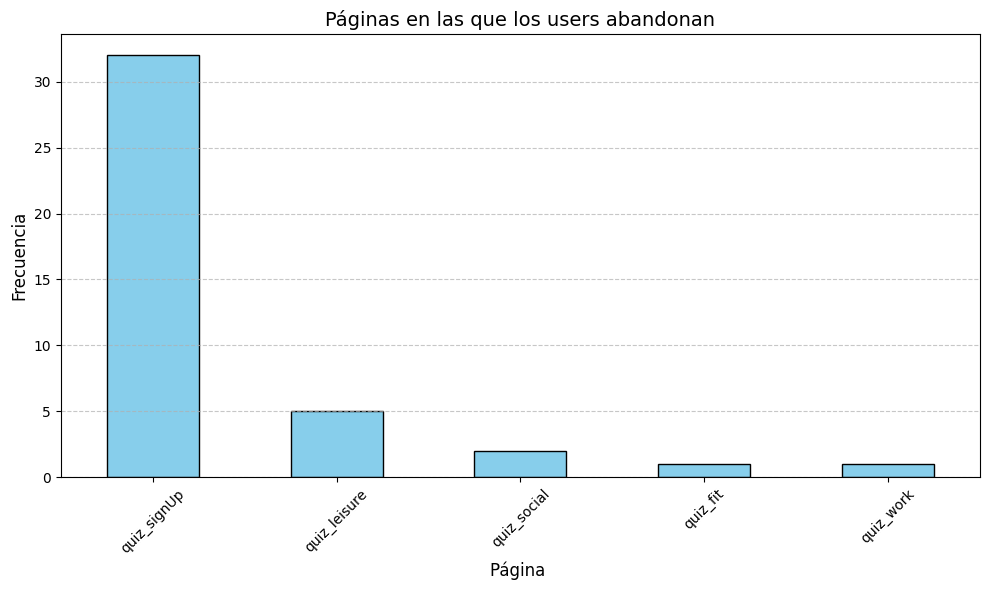

In [44]:
import matplotlib.pyplot as plt

# Obtener los datos
counts = df['last'].value_counts()

# Graficar
plt.figure(figsize=(10, 6))
counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Páginas en las que los users abandonan', fontsize=14)
plt.xlabel('Página ', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Paginas que mas tiempo ocupan

In [51]:
import pandas as pd

# Suponiendo que `movement_df` tiene las columnas 'user_id', 'sections', y 'time_spent'

# Expandir las listas de 'sections' y 'time_spent' en filas individuales
expanded_df = movement_df.explode(['sections', 'time_spent'])

# Convertir la columna 'time_spent' a segundos
def time_to_seconds(time_str):
    hours, minutes, seconds = map(int, time_str.split(':'))
    return hours * 3600 + minutes * 60 + seconds

expanded_df['time_spent_seconds'] = expanded_df['time_spent'].apply(time_to_seconds)

# Calcular la media del tiempo (en segundos) por página
average_time_per_page = (
    expanded_df.groupby('sections')['time_spent_seconds']
    .mean()
    .reset_index()
    .sort_values(by='time_spent_seconds', ascending=False)
)

# Opcional: Convertir de segundos a formato HH:MM:SS
def seconds_to_time(seconds):
    hours, remainder = divmod(seconds, 3600)
    minutes, seconds = divmod(remainder, 60)
    return f"{int(hours):02}:{int(minutes):02}:{int(seconds):02}"

average_time_per_page['average_time'] = average_time_per_page['time_spent_seconds'].apply(seconds_to_time)

# Mostrar la tabla final
print(average_time_per_page[['sections', 'average_time']])

             sections  time_spent_seconds
9        quiz_leisure       127794.250000
13        quiz_signUp        25396.511628
7           quiz_hair        13240.173913
17          quiz_work          793.733333
11        quiz_photos          429.595238
14         quiz_sizes          271.750000
10  quiz_measurements          119.558140
6       quiz_footwear           78.333333
16        quiz_styles           68.276596
2      quiz_bodyShape           32.272727
0    quiz_adventurous           30.590909
18           quiz_you           23.904762
8      quiz_highlight           22.750000
1          quiz_avoid           21.595238
4            quiz_fit           19.545455
5          quiz_focus           18.902439
15        quiz_social           18.714286
12        quiz_prices           15.750000
3           quiz_eyes            9.860465


Ruta mas frecuente

In [35]:
# Contar los recorridos únicos
path_counts = movement_df['sections'].value_counts().reset_index()
path_counts.columns = ['path', 'count']

# Calcular los porcentajes de cada recorrido
path_counts['percentage'] = (path_counts['count'] / path_counts['count'].sum()) * 100

# Mostrar los resultados
print(path_counts)

                                                 path  count  percentage
0   [quiz_work, quiz_fit, quiz_highlight, quiz_bod...     11   26.829268
1   [quiz_work, quiz_fit, quiz_highlight, quiz_bod...      5   12.195122
2                        [quiz_leisure, quiz_leisure]      2    4.878049
3                                      [quiz_leisure]      2    4.878049
4   [quiz_leisure, quiz_work, quiz_fit, quiz_highl...      2    4.878049
5   [quiz_leisure, quiz_work, quiz_fit, quiz_highl...      1    2.439024
6   [quiz_work, quiz_fit, quiz_highlight, quiz_bod...      1    2.439024
7   [quiz_work, quiz_fit, quiz_highlight, quiz_bod...      1    2.439024
8   [quiz_signUp, quiz_work, quiz_fit, quiz_highli...      1    2.439024
9   [quiz_work, quiz_fit, quiz_highlight, quiz_bod...      1    2.439024
10  [quiz_work, quiz_fit, quiz_highlight, quiz_bod...      1    2.439024
11  [quiz_leisure, quiz_work, quiz_fit, quiz_highl...      1    2.439024
12  [quiz_leisure, quiz_leisure, quiz_work, quiz_f.

Nº avances, recargas, retrocesos

In [36]:
# Opcional: Analizar los movimientos ("Avanza", "Recarga", "Retrocede") a nivel agregado
movement_counts = movement_df['movements'].explode().value_counts().reset_index()
movement_counts.columns = ['movement', 'count']
movement_counts['percentage'] = (movement_counts['count'] / movement_counts['count'].sum()) * 100

print(movement_counts)

    movement  count  percentage
0     Avanza    683   90.703851
1  Retrocede     56    7.436919
2    Recarga     14    1.859230
